<font color=red><h1> 1. Loading data and packages</h1></font>

<font color=green><h2> 1.1 Loading packages</h2></font>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<font color=green><h2> 1.2 Loading Data</h2></font>

[*********************100%%**********************]  1 of 1 completed


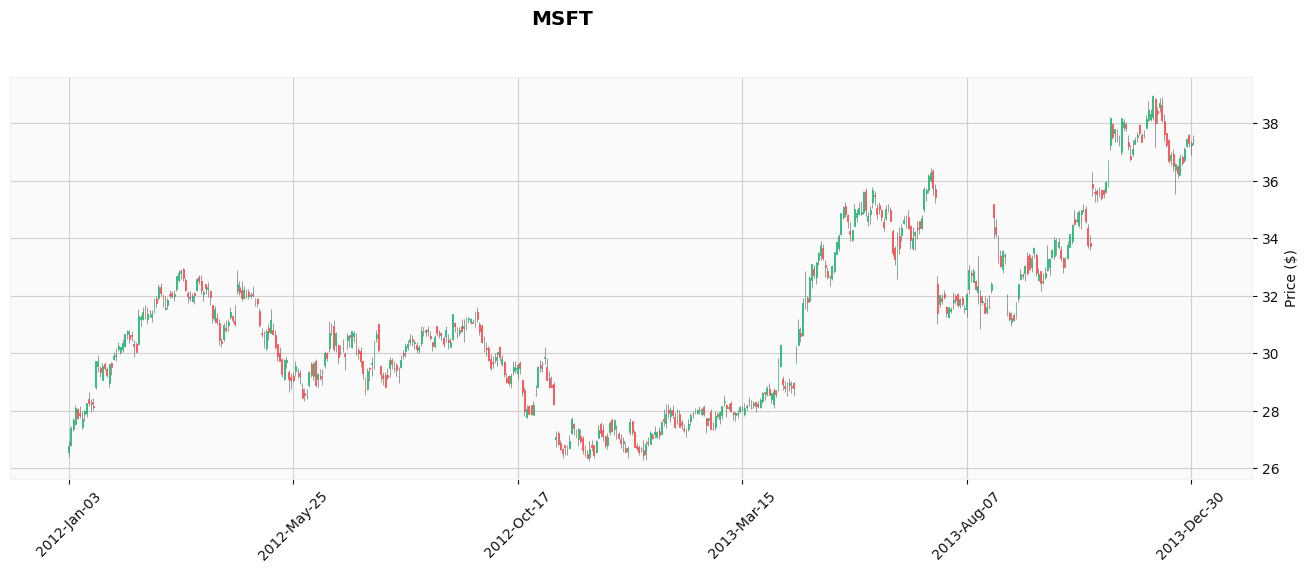

In [2]:
start_date=datetime.strptime('2012-01-01','%Y-%m-%d').date()
end_date=datetime.strptime('2014-01-01','%Y-%m-%d').date()
data=yf.download('MSFT',start=start_date,end=end_date)
mpf.plot(data, type='candle', style='yahoo', title='MSFT',ylabel='Price ($)',figratio=(15, 5))

<font color=red><h1> 2. Model Development</h1></font>

Text(0, 0.5, '# Shares')

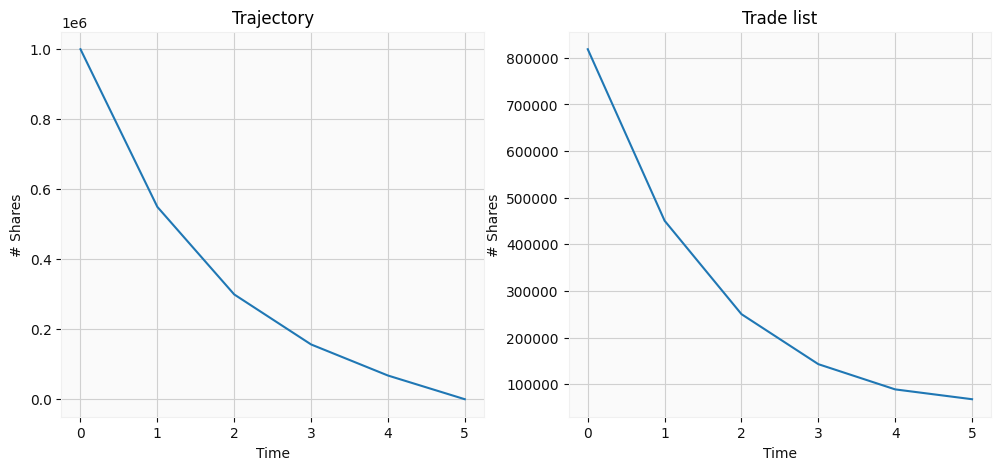

In [59]:
# The parameters below are set arbitrarily. 
# However, when applied in practice, they should be tailored to the specific security being traded. 
# For more details on how to estimate each parameter, please refer to the paper available on my GitHub profile.

drift=0.02
eta=2.5*10**(-6)
volatility=0.95
nb_shares=10**6
risk_aversion=10**(-6)
time=5
nb_intervals=5
gamma=2.5*10**(-6)
k=np.sqrt(risk_aversion*(volatility**2)/eta)
tau=time/nb_intervals
eta_tilde=eta-0.5*tau*gamma
times=(np.ones(nb_intervals+1)*tau)*np.arange(nb_intervals+1)
half_times=(np.arange(nb_intervals+1)-0.5)*tau

if eta_tilde>=0:
    if risk_aversion==0:
        trajectory=(nb_intervals-np.arange(nb_intervals+1))*nb_shares/nb_intervals
        trade_list=(nb_shares/nb_intervals)*np.ones(nb_intervals+1)
    if risk_aversion>0:
        x_bar=drift/(2*risk_aversion*(volatility**2))
        trajectory=(np.sinh(k*(time-times))/np.sinh(k*time))*nb_shares+(1-(np.sinh(k*(time-times))+np.sinh(k*times))/np.sinh(k*time))*x_bar
        trade_list=(2*np.sinh(0.5*k*tau)/np.sinh(k*time))*np.cosh(k*(time-half_times))*nb_shares+(2*np.sinh(0.5*k*tau)/np.sinh(k*time))*(np.cosh(k*half_times)-np.cosh(k*(time-half_times)))*x_bar
else:
    print("Model assumption violated")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()
axes[0].plot(trajectory)
axes[0].set_xlabel('Time')
axes[0].set_title('Trajectory')
axes[0].set_ylabel('# Shares')

axes[1].plot(trade_list)
axes[1].set_title('Trade list')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('# Shares')